In [23]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from cross_val_helpers import *

# Identify predictors and prediction variables

In [24]:
# Import the dataset
data = pd.read_csv("data/churn_cleaned.csv")
y = data["Churned"]
X = data.drop("Churned", axis=1)
X = pd.get_dummies(X)

In [25]:
# Import the discretized dataset
data_discrete = pd.read_csv("data/churn_cleaned_discrete.csv")
y_dis = data_discrete["Churned"]
X_dis = data_discrete.drop("Churned", axis=1)
X_dis = pd.get_dummies(X_dis)

# Stratified K-Fold Cross Validation

In [26]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf.get_n_splits(X, y)
print(skf)

results = []

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)


# Model Training

In [27]:
import importlib
import sys
importlib.reload(sys.modules['cross_val_helpers'])
from cross_val_helpers import plot_all_models_roc

## Logistic Regression

In [28]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
mdl_logis = LogisticRegression(max_iter=1000)

/Users/ctjenkin/neo4j-project-ej768/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ctjenkin/neo4j-project-ej768/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

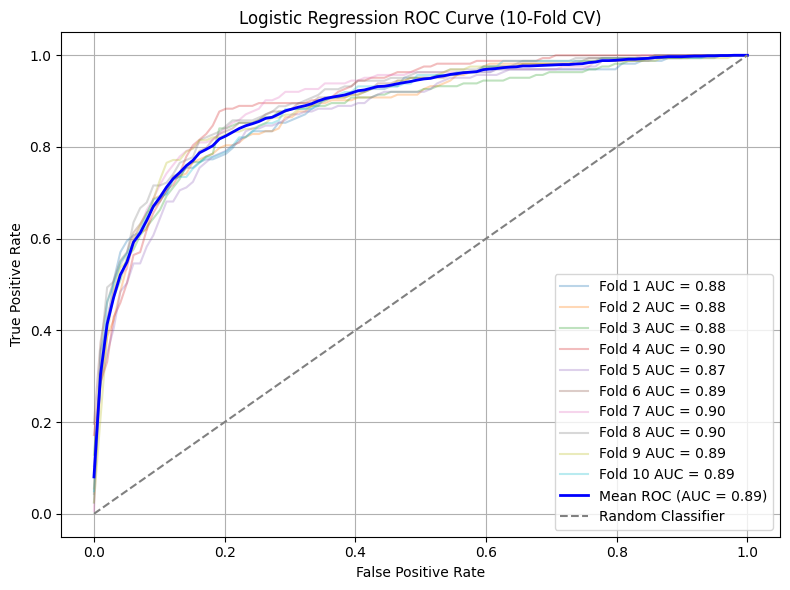

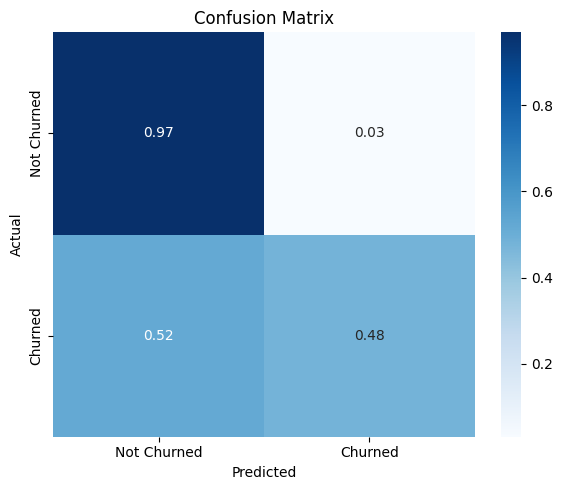

In [29]:
# Run Stratified Cross Validation
tprs_logis, fprs_logis, aucs_logis, conf_matrix_logis = run_stratified_cv(mdl_logis, skf, X, y)

# Store Results
results.append(summarize_cv_results("Logistic Regression", aucs_logis, conf_matrix_logis))

# Plot Results
plot_cv_roc_curve(tprs_logis, fprs_logis, aucs_logis, 
                  title="Logistic Regression ROC Curve (10-Fold CV)")
plot_confusion_matrix(conf_matrix_logis, class_labels=["Not Churned", "Churned"])

## Random Forest

In [30]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
mdl_forest = RandomForestClassifier(n_estimators=100, random_state=42)

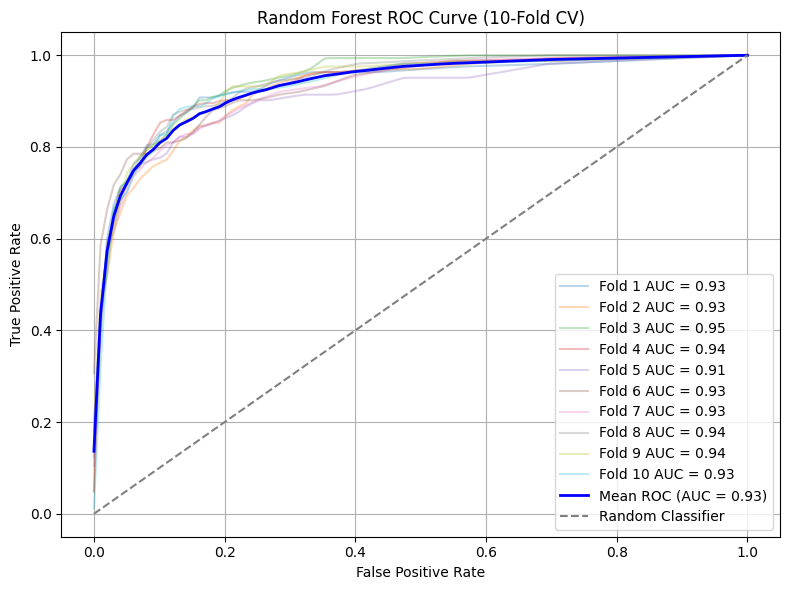

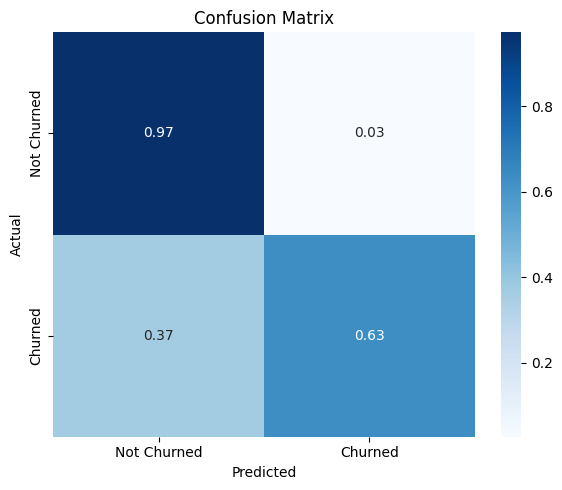

In [31]:
# Run Stratified Cross Validation
tprs_forest, fprs_forest, aucs_forest, conf_matrix_forest = run_stratified_cv(mdl_forest, skf, X, y)

# Store Results
results.append(summarize_cv_results("Random Forest", aucs_forest, conf_matrix_forest))

# Plot Results
plot_cv_roc_curve(tprs_forest, fprs_forest, aucs_forest, 
                  title="Random Forest ROC Curve (10-Fold CV)")
plot_confusion_matrix(conf_matrix_forest, class_labels=["Not Churned", "Churned"])

## XGBoost

In [32]:
# Import XGBoost Model
from xgboost import XGBClassifier

# Inititalize XGBoost Model
mdl_xgb = XGBClassifier(eval_metric='logloss', random_state=42)

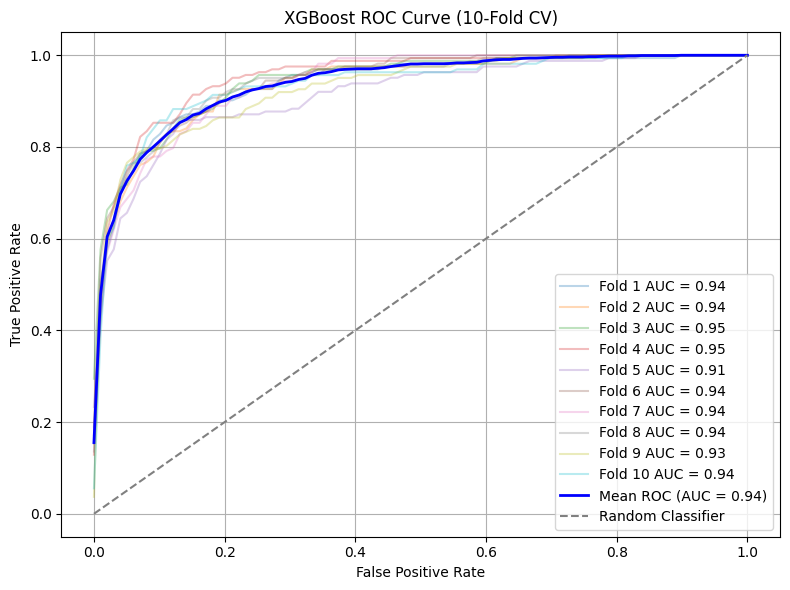

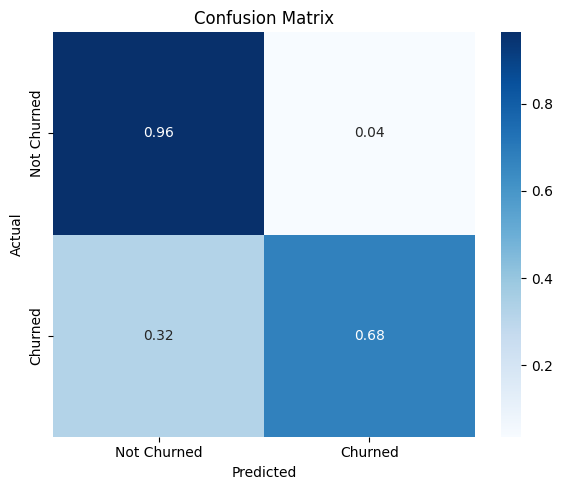

In [33]:
# Run Stratified Cross Validation
tprs_xgb, fprs_xgb, aucs_xgb, conf_matrix_xgb = run_stratified_cv(mdl_xgb, skf, X, y)

# Store Results
results.append(summarize_cv_results("XGBoost", aucs_xgb, conf_matrix_xgb))

# Plot Results
plot_cv_roc_curve(tprs_xgb, fprs_xgb, aucs_xgb, 
                  title="XGBoost ROC Curve (10-Fold CV)")
plot_confusion_matrix(conf_matrix_xgb, class_labels=["Not Churned", "Churned"])

## Bernoulli Bayesian Classfier

In [34]:
# Import XGBoost Model
from sklearn.naive_bayes import MultinomialNB

# Inititalize XGBoost Model
mdl_bayes = MultinomialNB()

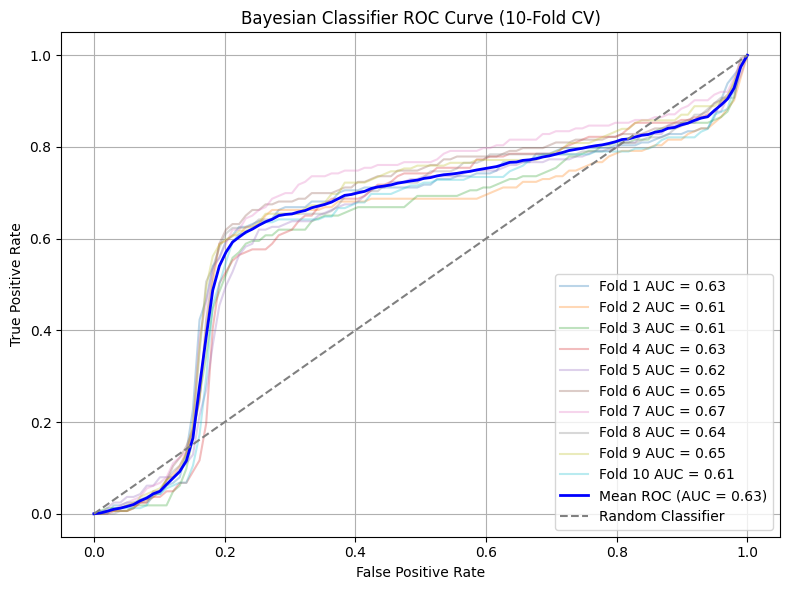

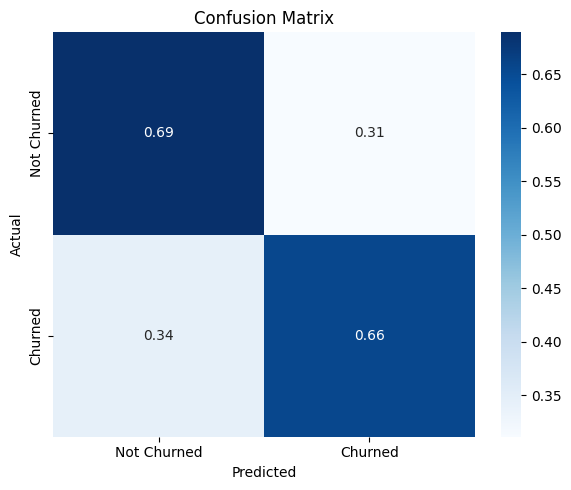

In [35]:
# Run Stratified Cross Validation
tprs_bayes, fprs_bayes, aucs_bayes, conf_matrix_bayes = run_stratified_cv(mdl_bayes, skf, X, y)

# Store Results
results.append(summarize_cv_results("Bayesian Classifier", aucs_bayes, conf_matrix_bayes))

# Plot Results
plot_cv_roc_curve(tprs_bayes, fprs_bayes, aucs_bayes, 
                  title="Bayesian Classifier ROC Curve (10-Fold CV)")
plot_confusion_matrix(conf_matrix_bayes, class_labels=["Not Churned", "Churned"])

# Summarizing Results

In [36]:
results_df = pd.DataFrame(results)
results_df

,Model,Mean AUC,Std AUC,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.888282,0.010011,0.890195,0.746411,0.479410,0.583832
1,Random Forest,0.932390,0.009239,0.919028,0.822027,0.633067,0.715278
2,XGBoost,0.937276,0.009560,0.917152,0.779433,0.675476,0.723741
3,Bayesian Classifier,0.630923,0.019078,0.683618,0.287524,0.655808,0.399775


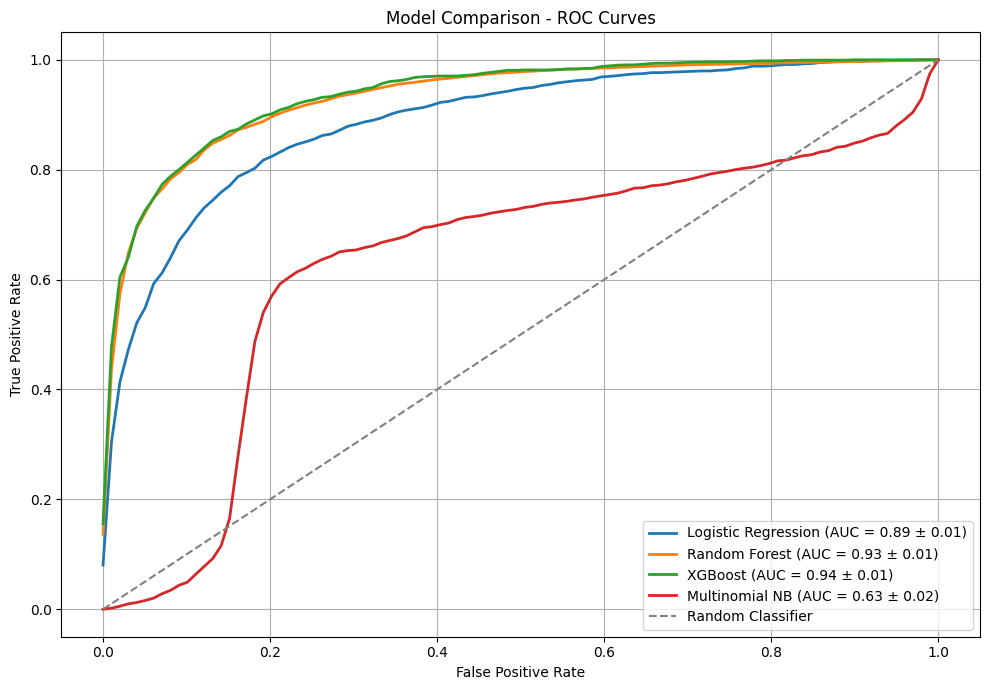

In [37]:
# Prepare the model ROC data
models_roc_data = [
    ("Logistic Regression", tprs_logis, fprs_logis[0], aucs_logis),
    ("Random Forest", tprs_forest, fprs_forest[0], aucs_forest),
    ("XGBoost", tprs_xgb, fprs_xgb[0], aucs_xgb),
    ("Multinomial NB", tprs_bayes, fprs_bayes[0], aucs_bayes)
    # Add more models as needed
]

# Plot them together
plot_all_models_roc(models_roc_data)

In [38]:
# Save XGBoost Model for use in Frontend Dashboard
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X, y)
xgb_model.save_model("app/model.xgb")

/Users/ctjenkin/neo4j-project-ej768/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
